#1.4.2

#Image Thresholding

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

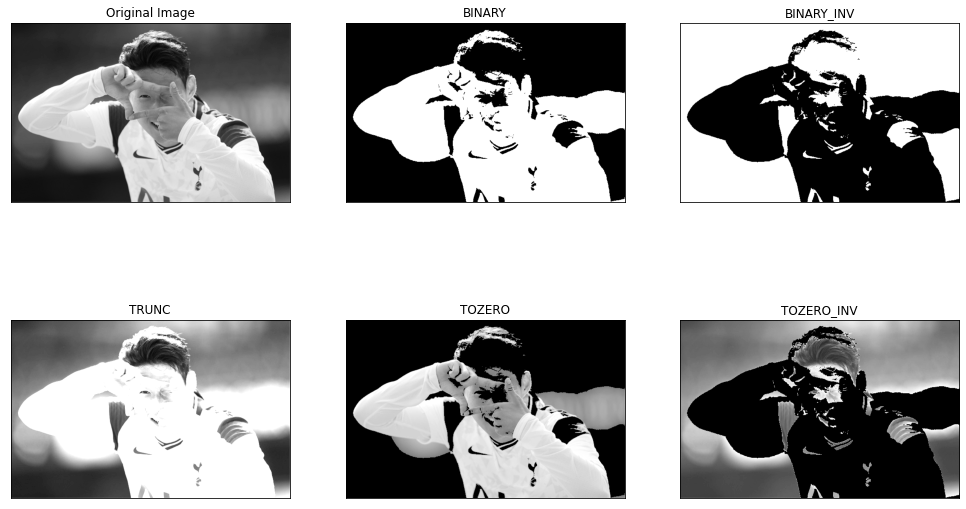

In [2]:
img = cv2.imread('sonny.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
h,w=256,512
gray=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray[i,j]=(j)%256
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

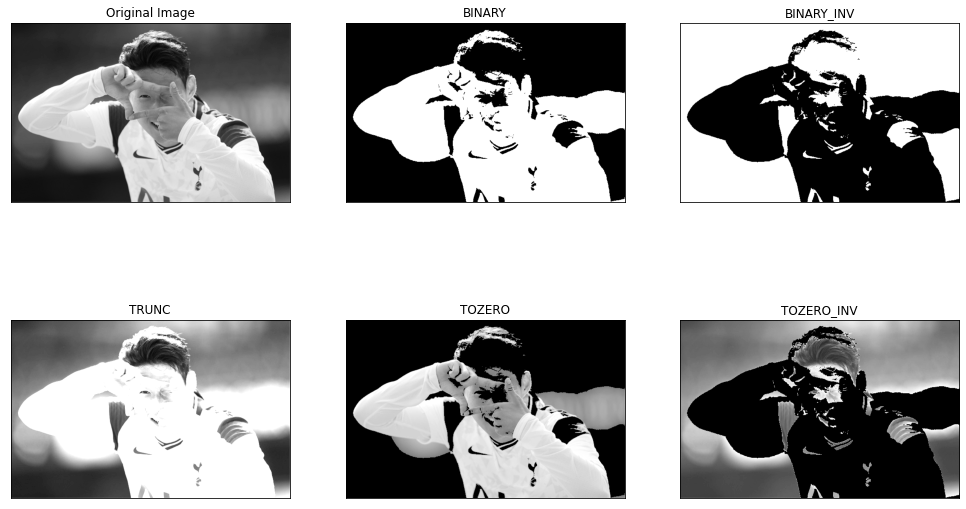

In [4]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Adaptive Thresholding

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

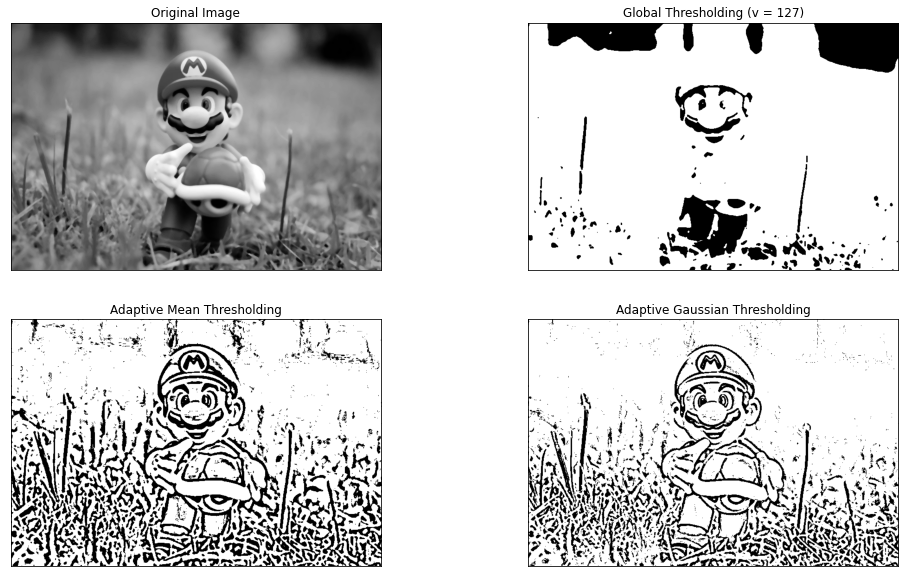

In [6]:
img = cv2.imread('mario.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,64,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(17,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Otsu’s Binarization

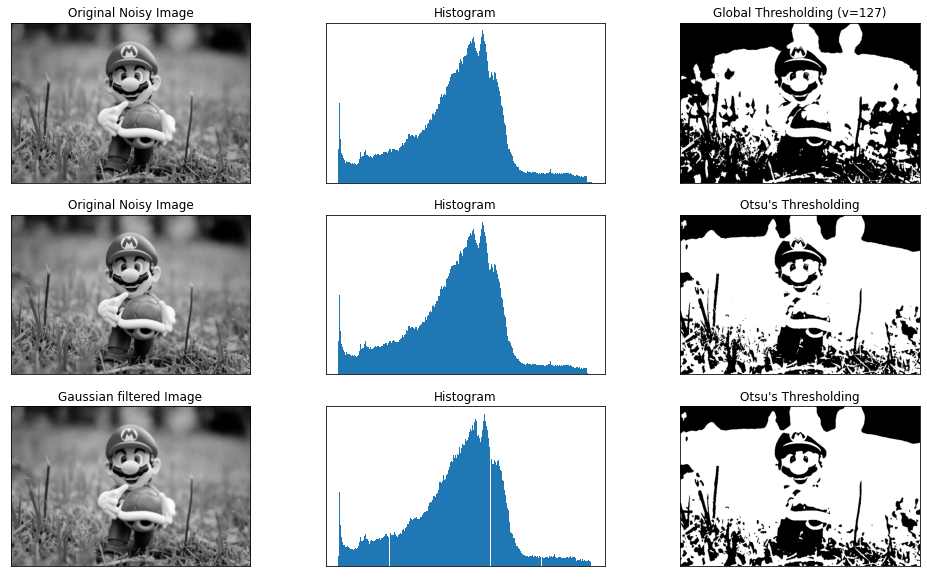

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('mario.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(17,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

Histogram

In [8]:
img = cv2.imread('mario.jpg',0)

In [9]:
h,w=img.shape

In [12]:
hist=np.zeros(256,np.uint32)

In [13]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1

In [14]:
hist

array([1160, 2728, 1485, 1032,  934,  838,  776,  683,  759,  700,  702,
        704,  670,  648,  673,  623,  658,  651,  610,  648,  666,  819,
       1043,  864,  908,  923, 1062, 1135,  964,  956,  929,  866,  931,
        868,  859,  916,  953,  970,  953,  971,  970,  942,  936,  980,
        978, 1050, 1037, 1070, 1069, 1030, 1093, 1147, 1149, 1070, 1145,
       1173, 1164, 1126, 1121, 1132, 1103, 1174, 1235, 1270, 1361, 1277,
       1358, 1397, 1517, 1503, 1662, 1682, 1597, 1625, 1625, 1615, 1558,
       1631, 1623, 1523, 1597, 1662, 1693, 1731, 1805, 1806, 1818, 1987,
       1874, 2009, 2038, 2155, 2199, 2164, 2371, 2397, 2310, 2430, 2530,
       2533, 2692, 2711, 2850, 2945, 3055, 2952, 3018, 3057, 3016, 3293,
       3321, 3398, 3508, 3622, 3743, 3748, 3759, 3784, 3760, 3889, 3910,
       3816, 4131, 4253, 4176, 4088, 4331, 4342, 4372, 4388, 4619, 4726,
       4757, 4870, 4796, 4952, 4997, 4842, 4640, 4535, 4461, 4350, 4539,
       4775, 5020, 5242, 5131, 4889, 4761, 4511, 41

In [15]:
hist[5]

838

In [16]:
img = cv2.imread('mario.jpg',0)
h,w=img.shape

h,w,ch=256,512,3
hist_s=np.zeros((h,w,3),np.uint8)

for i in range(256):
    l = (int) ((hist[i]/10000)*255)
    histImage = cv2.rectangle(hist_s,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)

#for i in range(256):
  #  l=(int)(hist[i]/10000)*255
   # img = cv2.rectangle(hist_s,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)
cv2.imshow('image',hist_s)
cv2.waitKey(0)
cv2.destroyAllWindows()

With Noise

In [17]:
import random
h,w=256,512
img=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256
        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)]=32
        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
noiseImg=np.copy(img)

m=16
for i in range(h):
    for j in range(w):
        value=noiseImg[i,j]+random.randint(-m,m)
        if value< 0:
            noiseImg[i,j]=0
        elif value>255:
            noiseImg[i,j]=255
        else:
            noiseImg[i,j]=value
cv2.imshow('image',img)
cv2.imshow('image',noiseImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

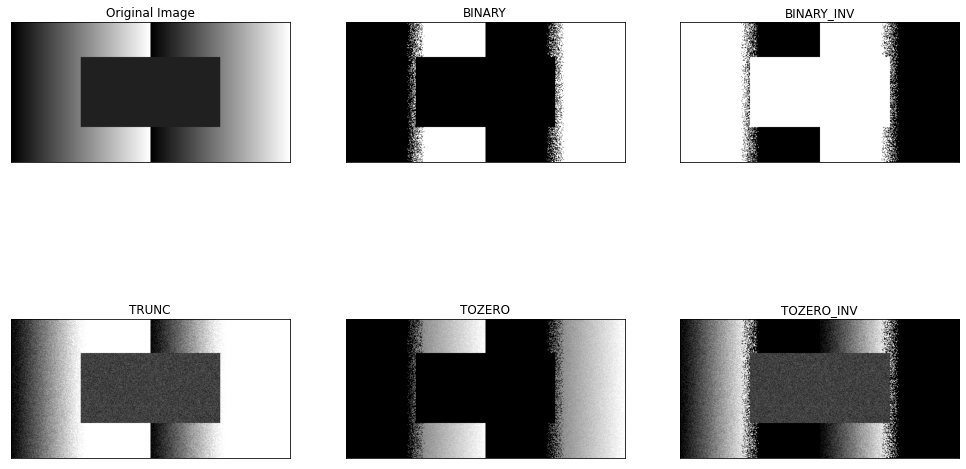

In [21]:
ret,thresh1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

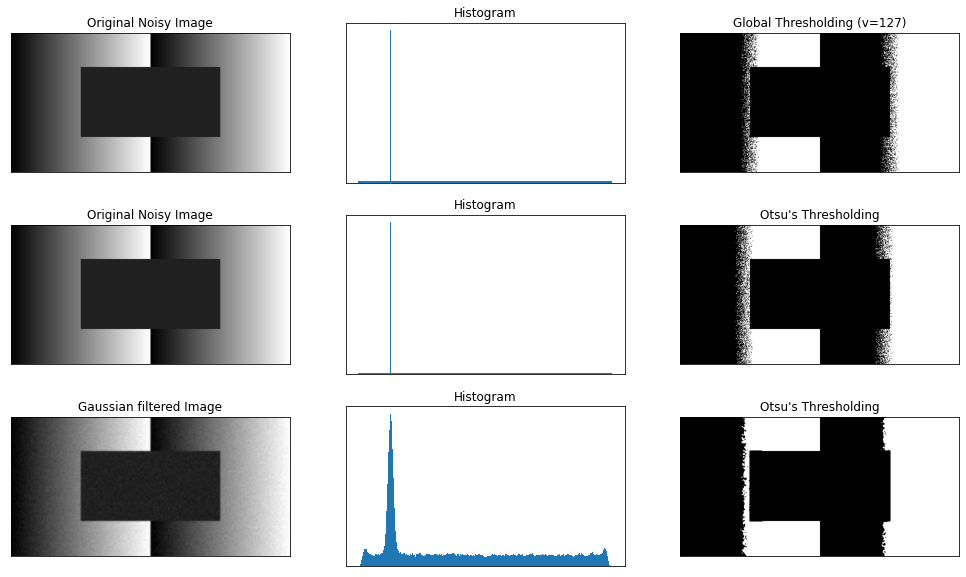

In [22]:
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(17,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()